In [243]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
# Read Train & Test dataset
raw_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [245]:
# Display first few rows
raw_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [246]:
# Display stats of the data
raw_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [247]:
# Check for missing values
raw_data.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [248]:
raw_data['education'].isna().sum()

2409

In [249]:
raw_data['previous_year_rating'].isna().sum()

4124

In [250]:
# Check raw dataset rows & cols
raw_data.shape

(54808, 14)

In [251]:
# remove the rows having null value of education & previous_year_rating
raw_data.dropna(subset=['education', 'previous_year_rating'], how='all',inplace=True)

In [252]:
raw_data.shape

(54423, 14)

In [253]:
raw_data['education'].isnull().sum()

2024

In [254]:
raw_data['previous_year_rating'].isna().sum()

3739

In [255]:
raw_data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [256]:
raw_data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [257]:
raw_data['previous_year_rating'].fillna(round(raw_data['previous_year_rating'].mean()), inplace=True)

In [258]:
raw_data['previous_year_rating'].isna().sum()

0

In [259]:
raw_data['previous_year_rating'].unique()

array([5., 3., 1., 4., 2.])

In [260]:
raw_data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [261]:
raw_data['education'].fillna(method="ffill", inplace=True)

In [262]:
raw_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [263]:
raw_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54423.000000,54423.000000,54423.000000,54423.000000,54423.000000,54423.000000,54423.000000,54423.000000,54423.000000
mean,39196.259045,1.252669,34.872278,3.306635,5.899932,0.352774,0.023189,63.426860,0.085313
std,22585.682693,0.608796,7.640217,1.218788,4.260406,0.477837,0.150504,13.355682,0.279350
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19680.500000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39233.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58735.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [264]:
# Drop useless feature
raw_data.drop(columns=['employee_id'], axis=1, inplace=True)

In [265]:
raw_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [266]:
raw_data['department'].nunique()

9

In [267]:
raw_data['region'].nunique()

34

In [268]:
categorical_features = [cols for cols in raw_data.columns if raw_data[cols].dtypes=='object']
numerical_features = [cols for cols in raw_data.columns if raw_data[cols].dtypes!='object']

In [269]:
print(f'Categorical Features are {categorical_features}\nNumerical Features are{numerical_features}')

Categorical Features are ['department', 'region', 'education', 'gender', 'recruitment_channel']
Numerical Features are['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [270]:
for cols in categorical_features:
    print(f'{cols}: {raw_data[cols].nunique()} \n{raw_data[cols].unique()}\n')

department: 9 
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

region: 34 
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']

education: 3 
["Master's & above" "Bachelor's" 'Below Secondary']

gender: 2 
['f' 'm']

recruitment_channel: 3 
['sourcing' 'other' 'referred']



In [271]:
import category_encoders as ce
encoder_1 = ce.OrdinalEncoder(cols=['gender', 'recruitment_channel'], return_df=True, 
                           mapping=[{'col':'gender', 'mapping':{'m':0,'f':1}}, 
                                    {'col':'recruitment_channel', 'mapping':{'sourcing':0, 'referred':1, 'other':3}},
                                   {'col':'department', 'mapping':{'Sales & Marketing':0, 'Operations':1, 'Technology':2, 
                                                                   'Analytics':3, 'R&D':4, 'Procurement':5, 'Finance':6, 'HR':7, 
                                                                   'Legal':8}}])

In [272]:
raw_data = encoder_1.fit_transform(raw_data)

In [273]:
raw_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,region_7,Master's & above,1,0,1,35,5.0,8,1,0,49,0
1,1,region_22,Bachelor's,0,3,1,30,5.0,4,0,0,60,0
2,0,region_19,Bachelor's,0,0,1,34,3.0,7,0,0,50,0
3,0,region_23,Bachelor's,0,3,2,39,1.0,10,0,0,50,0
4,2,region_26,Bachelor's,0,3,1,45,3.0,2,0,0,73,0


In [274]:
raw_data.drop('region', inplace=True, axis=1)

In [275]:
raw_data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,Master's & above,1,0,1,35,5.0,8,1,0,49,0
1,1,Bachelor's,0,3,1,30,5.0,4,0,0,60,0
2,0,Bachelor's,0,0,1,34,3.0,7,0,0,50,0
3,0,Bachelor's,0,3,2,39,1.0,10,0,0,50,0
4,2,Bachelor's,0,3,1,45,3.0,2,0,0,73,0


In [276]:
encoder_2 = ce.OneHotEncoder(cols='education', handle_unknown='return_nan', return_df=True)

In [277]:
raw_data = encoder_2.fit_transform(raw_data)

In [278]:
raw_data.head()

,department,education_1,education_2,education_3,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,1.0,0.0,0.0,1,0,1,35,5.0,8,1,0,49,0
1,1,0.0,1.0,0.0,0,3,1,30,5.0,4,0,0,60,0
2,0,0.0,1.0,0.0,0,0,1,34,3.0,7,0,0,50,0
3,0,0.0,1.0,0.0,0,3,2,39,1.0,10,0,0,50,0
4,2,0.0,1.0,0.0,0,3,1,45,3.0,2,0,0,73,0


In [279]:
y = raw_data['is_promoted']

In [280]:
raw_data.drop('is_promoted', axis=1, inplace=True)

In [281]:
x = raw_data

In [282]:
x.head()

,department,education_1,education_2,education_3,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,1.0,0.0,0.0,1,0,1,35,5.0,8,1,0,49
1,1,0.0,1.0,0.0,0,3,1,30,5.0,4,0,0,60
2,0,0.0,1.0,0.0,0,0,1,34,3.0,7,0,0,50
3,0,0.0,1.0,0.0,0,3,2,39,1.0,10,0,0,50
4,2,0.0,1.0,0.0,0,3,1,45,3.0,2,0,0,73


In [283]:
x.shape

(54423, 13)

In [284]:
y.shape

(54423,)

In [285]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_2 = scaler.fit_transform(x[x.columns])

In [286]:
print(x_2.shape)

(54423, 13)


In [287]:
type(x_2)

numpy.ndarray

In [288]:
type(y)

pandas.core.series.Series

In [289]:
df = pd.DataFrame(x_2, columns=raw_data.columns)

In [290]:
df.shape

(54423, 13)

In [291]:
df.head()

,department,education_1,education_2,education_3,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.000,1.0,0.0,0.0,1.0,0.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667
1,0.125,0.0,1.0,0.0,0.0,1.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000
2,0.000,0.0,1.0,0.0,0.0,0.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333
3,0.000,0.0,1.0,0.0,0.0,1.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333
4,0.250,0.0,1.0,0.0,0.0,1.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667


In [292]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

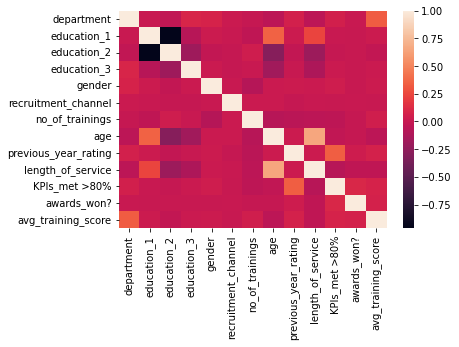

<Figure size 1440x1440 with 0 Axes>

In [300]:
corr = df.corr()
sns.heatmap(corr)
plt.figure(figsize=(20, 20))
plt.show()

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x, y)

ValueError: Found input variables with inconsistent numbers of samples: [54423, 1000]